# Iris Flower Dataset

The Iris dataset is a classic dataset in the field of machine learning and statistics.

The dataset consists of 150 samples of iris flowers, each belonging to one of three species: **Setosa**, **Versicolor**, and **Virginica**.

## Columns: 

* **sepal-length**:The length of the sepal, which is the outermost part of the flower that protects the petals.
* **sepal-width**: The width of the sepal, measured at its widest point.
* **petal-length**: The length of the petal, which is the colorful inner part of the flower.
* **petal-width**: The width of the petal, measured at its widest point.
* **species**: The species of iris flower, which can be one of three classes: Setosa, Versicolor, or Virginica.

These columns provide measurements of various parts of the iris flower, along with the corresponding species labels, making it a versatile dataset for analysis and classification tasks.

**Tasks:** In this project, you are going to use Logistic Regression to categorize iris flowers into three distinct species: setosa, versicolor, and virginica based on their unique characteristics. Follow the steps below and ensure you answer the accompanying questions as a minimum requirement.

## Step 1: Import Library

In [112]:
import numpy as np
import pandas as pd

## Step 2: Read the Data

In [113]:
data = pd.read_csv("iris.csv")
data

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 3: Data Exploration/Visualization

What are some interesting findings from your plots?

Please answer the following questions based on your plots:
- Can we differentiate the species based on **sepal length**? If so, which species stands out the most? If not, explain why. 
- What is the range of **sepal widths** for the majority of the data? Are there any overlapping ranges among species?
- Based on **petal length**, is it possible to clearly identify one of the species? Which one?
- Which species has the **shortest petal width** on average, and how does it compare to the others?

In [114]:
import matplotlib.pyplot as plt

sLen = data["sepal-length"]
sWid = data["sepal-width"]
pLen = data["petal-length"]
pWid = data["petal-width"]

y = data["species"]

y_unique = list(set(y))
species_colors = [y_unique.index(s) for s in y]

## Step 4: Split the Data

In [115]:
X1tr = np.array(sLen[:int(sLen.size / 2)], dtype=float)
X1ts = np.array(sLen[int(sLen.size / 2):], dtype=float)

X2tr = np.array(sWid[:int(sLen.size / 2)], dtype=float)
X2ts = np.array(sWid[int(sLen.size / 2):], dtype=float)

X3tr = np.array(pLen[:int(sLen.size / 2)], dtype=float)
X3ts = np.array(pLen[int(sLen.size / 2):], dtype=float)

X4tr = np.array(pWid[:int(sLen.size / 2)], dtype=float)
X4ts = np.array(pWid[int(sLen.size / 2):], dtype=float)

Ytr = y[:int(sLen.size / 2)].tolist()
Yts = y[int(sLen.size / 2):].tolist()



## Length of sepal vs species

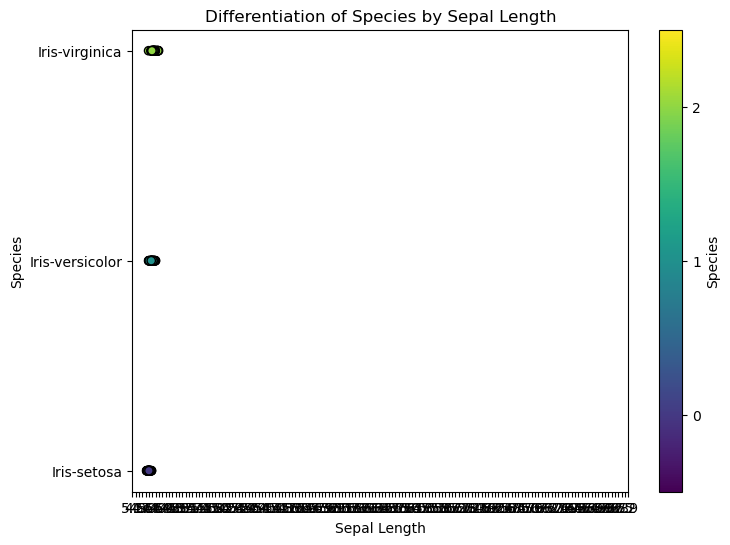

In [116]:
# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sLen, y, c=species_colors, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, ticks=range(len(y_unique)), label='Species')
plt.clim(-0.5, len(y_unique) - 0.5)
plt.xlim(round(min(sLen)) - 1, round(max(sLen)) + 1)  # Add padding to the x-axis
plt.xticks(ticks=np.arange(len(sLen)), labels=sLen)
plt.yticks(ticks=range(len(y_unique)), labels=y_unique)
plt.xlabel('Sepal Length')
plt.ylabel('Species')
plt.title('Differentiation of Species by Sepal Length')
plt.show()


## Step 5: Model Building

Using `model.get_params()` allows you to check the 'multi_class' method currently set for your logistic regression model. What happens if we choose the alternative method for a multi-class problem? You can experiment with different settings, such as 'ovr' (one-vs-rest) and 'multinomial', to understand their impact. Explore more in the [documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html), and compare the model's performance under these different schemes for multiclass classification.

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Model_1 with multi_class = ""

model = LogisticRegression()

#Nx = X2tr.reshape(-1,1)
#Nxts = X2ts.reshape(-1,1)
Xtr, Xts, Ytr, Yts = train_test_split(np.array(data[data.columns[:-1]], dtype=float), y, test_size=0.3, random_state=42)


#model.classes_ = y_unique

reg = model.fit(Xtr, Ytr)

pred = model.predict(Xts)


accuracy = accuracy_score(Yts, pred)
print(f"{accuracy:.2f} score")
model.get_params()


1.00 score


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [130]:
# Model_2 with multi_class = ""
Xtr, Xts, Ytr, Yts = train_test_split(np.array(data[data.columns[:-1]], dtype=float), y, test_size=0.3, random_state=42)

model.multi_class = "ovr"

reg = model.fit(Xtr, Ytr)

pred = model.predict(Xts)


accuracy = accuracy_score(Yts, pred)
print(f"{accuracy:.2f} score")
model.get_params()

0.96 score


/Users/junwei/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Step 6: Model Performance (metrics)

In [ ]:
# Performance of model_1


In [ ]:
# Performance of model_2


**What is your prediction on these two lists of values?**

```python

print(`your_model`.predict([[6.3,3.4,5.6,2.4]]))

print(`your_model`.predict([[6.3,3.4,5.6,2.4]]))
```